
<h1>Section 1: Dataset</h1> 

this dataset contains data for yearly number of objects launched into outer-space from different countries all over the world. Credit to the organization "Our World in Data", link: https://ourworldindata.org/grapher/yearly-number-of-objects-launched-into-outer-space. 

I'm quite interested in rocket science as well as space exploration, so I wants to try predict the close future of the space technology. Amount of rocket being launched into space is a great way to measure this. I searched "rocket space dataset" and google leads me to this dataset. Objects are defined here as satellites, probes, landers, crewed spacecrafts, and space station flight elements launched into Earth orbit or beyond. 

The objects amount sent into outer space instead of launch times, representing hard mission success times compared to attempt times, provides a more solid indication of space technology improvements.

After checking the data amount: 1127 rows x 4 variables, time period: 1957-2022 (broad enough). I found this dataset seems capable of being analyzed inside this project.

In [19]:
import pandas as pd
import matplotlib as plt
df = pd.read_csv("yearly-number-of-objects-launched-into-outer-space.csv")
df

,Entity,Code,Year,Yearly number of objects launched into outer space
0,Algeria,DZA,2002,1
1,Algeria,DZA,2010,1
2,Algeria,DZA,2016,3
3,Algeria,DZA,2017,1
4,Angola,AGO,2017,1
...,...,...,...,...
1122,World,OWID_WRL,2019,586
1123,World,OWID_WRL,2020,1274
1124,World,OWID_WRL,2021,1813
1125,World,OWID_WRL,2022,2478



<h1>Section 2: Exploratory Data Analysis</h1>

 explain what descriptive statistics can help you give a broad overview of the data (ex: size, shape, interesting descriptive statistics, etc.). In Python, do this exploratory data analysis.


Reference Labs: lab_intro, lab_pandas, lab_exp_design, lab_simpsons_paradox

In [20]:
#load the super long name into a String variable for convience
amount = "Yearly number of objects launched into outer space"
df_world = df[df.Entity == "World"] # take world's data out for convience

 #### 1. The shape of the line graph
 - gives a general idea of the trend of the growth of numbers of things getting launched into outer space.    
 - (analyzed on both specific country data and Total world data)

<Axes: xlabel='Year'>

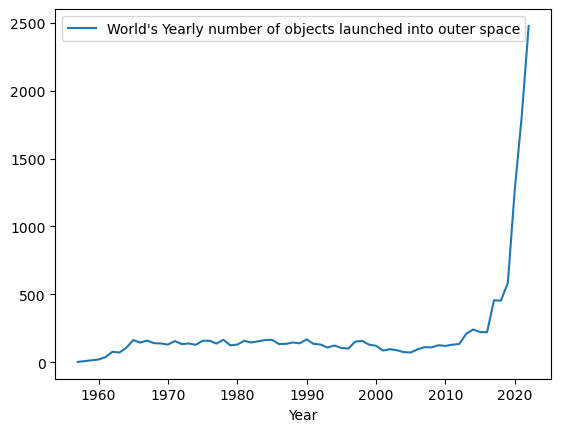

In [21]:
#a generally trend
df_world.plot.line(x = "Year", y = amount, label = "World's " + amount)
# it was kind of impressive, we could see the data begins from sub-1960,
# and a sudden increase inside 5 years from 1960 to 1965, increased from near 0 object/year to around 200 object/year
# little turbulence occured, but generally keeping that level until a gentle decrease after late 1990
# then a sudden super sharp increase around 2015, numerically increased from 250 to 2500 object/year

 #### 2. Year the world launched most/least number of objects into outer space
 - provides general idea of wax and wane of space century.  
 - (analyzed on Total world data)

In [22]:
# Year that the world sent most objects into outer space
df_world.loc[df_world[amount] == df_world[amount].max()]
# well, it seems to be 2022, which is the latest year this data set contains
# That implys we are currently in a very advanced space technology period

,Entity,Code,Year,Yearly number of objects launched into outer space
1125,World,OWID_WRL,2022,2478


In [23]:
# Year that the world sent least objects into outer space
df_world.loc[df_world[amount] == df_world[amount].min()]
# 1957, which is the earlist year, seems human is getting better since then

,Entity,Code,Year,Yearly number of objects launched into outer space
1060,World,OWID_WRL,1957,2


In [24]:
df_world[amount].sum()

14599

 #### 3. Top Entities launched most objects into outer space, 
 - gives more specific indication for contributions 
 - (analyzed on specific country data)

In [25]:
# group by Entity and aggregate them by sum so we could see the total sum by each Entity, didn't forget to reset index or it will look mess!
temp = df.groupby("Entity").agg("sum").reset_index()
# remove the world since it's just sum and not really tell things here
df_Egrouped = temp.loc[temp["Entity"] != "World"]
df_Egrouped.nlargest(5, amount)
# We could see the top is United States! Not very suprised since the US got pretty powerful aerospace technologies and strong companies like space X and blue origin...
# The second is Russia, but I think the Entity Russia includes both launches during Soviet Union period.
# I guess this is some how influenced by cold war

C:\Users\Han Jiang\AppData\Local\Temp\ipykernel_6416\3446342284.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby("Entity").agg("sum").reset_index()


,Entity,Year,Yearly number of objects launched into outer space
100,United States,129350,7466
77,Russia,131307,3661
17,China,93918,923
99,United Kingdom,75917,622
45,Japan,103815,314



<h1>Section 3: Exploratory Data Visualization</h1> 

In Python, create at least one data visualization. This does not need to be complex, but should showcase something about your EDA or Data Science analysis. In Markdown, provide at least a two sentence summary of this result.

Reference Labs: lab_plots, lab_gpa

<Axes: xlabel='Year'>

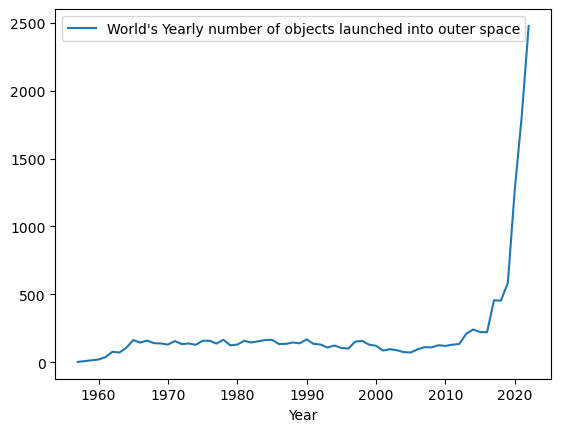

In [26]:
# world's line plot
df_world.plot.line(x = "Year", y = amount, label = "World's " + amount)

<Axes: xlabel='Year'>

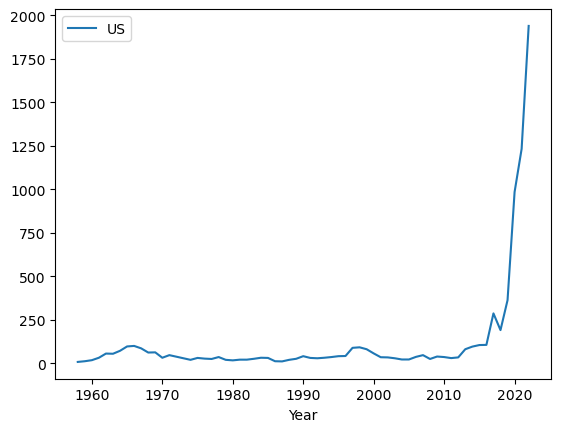

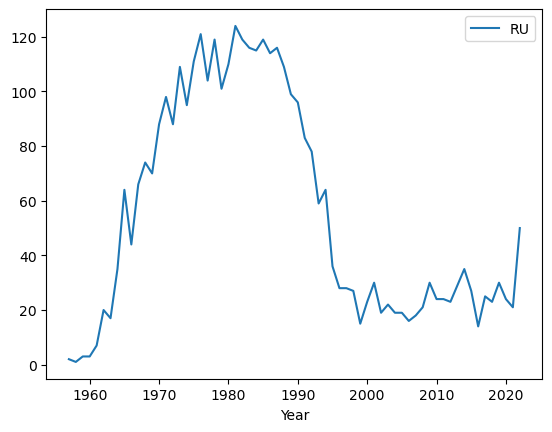

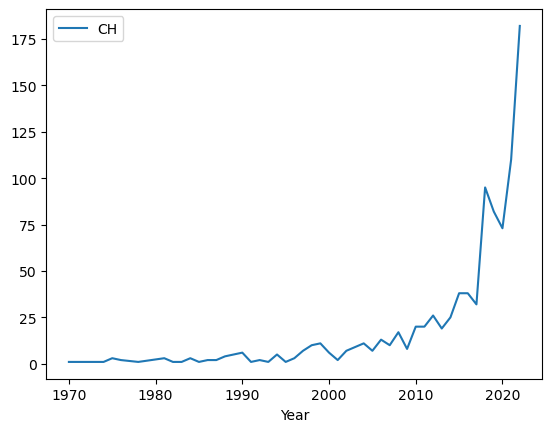

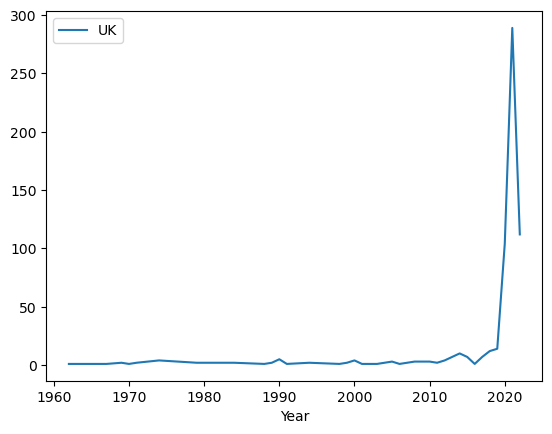

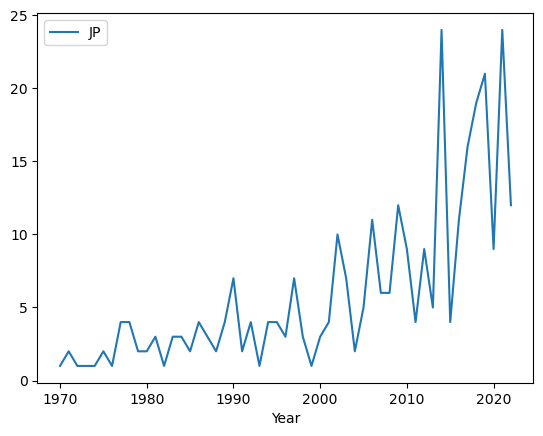

In [27]:
df_US = df.loc[(df.Entity == "United States")]
df_RU = df.loc[(df.Entity == "Russia")]
df_CH = df.loc[(df.Entity == "China")]
df_UK = df.loc[(df.Entity == "United Kingdom")]
df_JP = df.loc[(df.Entity == "Japan")]

# Even they are top 5, there's quite large difference between them, putting all of them in one plot may let several lines
# being squeezed and can't tell anything, so putting them in 5 different plots
df_US.plot.line(x = "Year", y = amount, label = "US")
df_RU.plot.line(x = "Year", y = amount, label = "RU")
df_CH.plot.line(x = "Year", y = amount, label = "CH")
df_UK.plot.line(x = "Year", y = amount, label = "UK")
df_JP.plot.line(x = "Year", y = amount, label = "JP")

US, China, UK, and Japan appears a big increase from 2015, similar to the world-wide count. Russia overcame a great upward trend from 1960 to 1980, but big down hill till late 1990s. 


<h1>Section 4: Data Science</h1> 

In Markdown, explain at least one question you have about your dataset. Clearly state the questions you have and how you plan on using Python to answer them. This may involve cleaning or selecting a subset of the data. You can use any technique you learned in DISCOVERY that is beyond simple descriptive statistics. You can use regression, hypothesis testing, correlation, simulation, or ideas from any of the labs, MicroProjects, or lecture. In Python, do the data science! :)

Reference Labs: lab_favorites, lab_similarity, lab_justice, lab_probability, lab_random_variable, lab_hypothesis_tests, lab_regression, lab_kmeans

#### **1. Predict the close future: how many objects are going to be launched into outer space in 2025(3 years after the latest year in the dataset).**

Planning use Linear regression to predict, and only cut close sections out for that.

<Axes: xlabel='Year'>

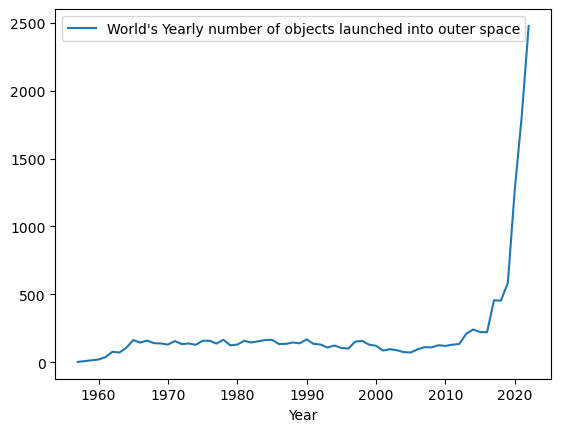

In [28]:
df_world.plot.line(x = "Year", y = amount, label = "World's " + amount)

     Entity      Code  Year  \
1125  World  OWID_WRL  2022   

      Yearly number of objects launched into outer space  
1125                                               2478   
     Entity      Code  Year  \
1118  World  OWID_WRL  2015   
1119  World  OWID_WRL  2016   
1120  World  OWID_WRL  2017   
1121  World  OWID_WRL  2018   
1122  World  OWID_WRL  2019   
1123  World  OWID_WRL  2020   
1124  World  OWID_WRL  2021   

      Yearly number of objects launched into outer space  
1118                                                222   
1119                                                221   
1120                                                456   
1121                                                454   
1122                                                586   
1123                                               1274   
1124                                               1813   


C:\Users\Han Jiang\AppData\Local\Temp\ipykernel_6416\3682822164.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_15s = df_world[df.Year >= 2015]


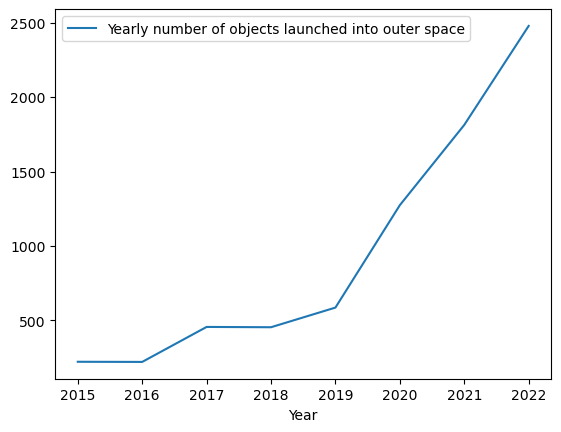

In [29]:
# Due to there's a great increase from around 2015, we choose to only include the analyze set from 2015-2022
df_15s = df_world[df.Year >= 2015]
df_15s.plot.line(x = "Year", y = amount)
# use linear regression: it seems little far from linear and we could only have 8 data points to fit our model
# which might not be really proper, but let's give it a try
# due to only have 8 data points, I'll use 7 of them into training and one as testing
test_df15s = df_15s.sample(frac = 1/8)
train_df15s = df_15s[~df_15s.index.isin(test_df15s.index)]
# verify it looks right
print(test_df15s)
print(train_df15s)

In [30]:
# train our model
from sklearn.linear_model import LinearRegression
from array import array
import numpy as np

linearModel = LinearRegression()

x_train = np.array(train_df15s["Year"]).reshape(-1, 1)
y_train = np.array(train_df15s[amount]).reshape(-1, 1)
y_test = np.array(test_df15s[amount]).reshape(-1, 1)
a = np.array([2023, 2024, 2025]).reshape(-1, 1)

linearModel.fit( x_train, y_train )

linearPredictions = linearModel.predict( a )

linearPredictions


array([[1969.60714286],
       [2219.92857143],
       [2470.25      ]])

Result: we could see our model works, the prediction for number of objects sent in space all over the world in 2023, 2024, and 2025 is 2348.46, 2661.50, and 2974.54, which is quite a lot. Things varies from trails, sometimes I got only around 2300 at 2025

So I decided to get a cumulative average result from running it many times

In [31]:

def repeatLinearPredict(n):
    result = 0
    for i in range(n):
        train_df15s = df_15s
        # use all of 8 points into prediction
        x_train = np.array(train_df15s["Year"]).reshape(-1, 1)
        y_train = np.array(train_df15s[amount]).reshape(-1, 1)
        a = np.array([2025]).reshape(-1, 1)
        linearModel.fit( x_train, y_train )
        prediction = linearModel.predict( a )
        result += prediction[0][0]
    print(result/n)
    return result/n
repeatLinearPredict(5000)

2976.0595238096685


2976.0595238096685

seems it stablized around 2976.05952 objects in 2025, that could possibly be the amount of objects human sent into outer space in 2025

**I noticed** that when I run the cell with 7 data points for 5000 repeat, the result will fluctuate from 2953 to 2980, but with 8 data points, every round is precisely around 2976.059523.

 #### **2. How many set back years are there in the history? Any huge setbacks?**
 - define set back years as: a year that world's total sent-in-outer-space objects are less than last year's: Δobject sent-in-outer-space worldwide < 0
 - define huge set back as: -Δobject sent-in-outer-space world wide > 10 pieces (since world-wide is accumulative and need higher standard)
 - define huge set back in Entity (Country): -Δobject sent-in-outer-space > 5 pieces 

Planning writing user-define-functions with algorithms designed for this question, and run them multiple times with some plots that could provide better visualizations

In [32]:
def setbackCheck(inputdf, n): 
    count = 0
    majorCount = 0
    setBack = []
    MajorSetBack = []
    # Let's goooo cycle!
    for i in inputdf["Year"].sort_values(): 
        # prevent run in non-exist value
        if (i > inputdf["Year"].sort_values().values[0]):
            # load now and past
            now = inputdf.loc[inputdf.Year == i].reset_index()[amount].values[0]
            past = inputdf.loc[inputdf.Year == i - 1].reset_index()[amount].values[0]
            #compare for setback&major setback
            if (past > now):
                count += 1
                setBack.append({"setback year": i})
                #self-define major setback standard
                if (past - now > n):
                    majorCount += 1
                    MajorSetBack.append({"MajorSetBack year": i})
    print("there's ", count, "set back years, and", majorCount, "Major set back years")
    # print(pd.DataFrame(setBack))
    # print(pd.DataFrame(MajorSetBack))
    pd.DataFrame(MajorSetBack).plot.hist(bins = 20)
    pd.DataFrame(setBack).plot.hist(bins = 20)
    return 1

World
there's  28 set back years, and 14 Major set back years


1

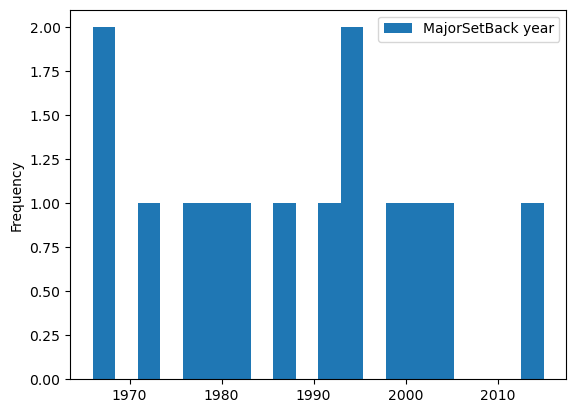

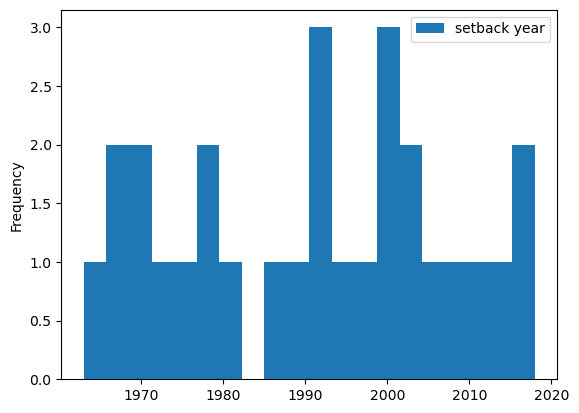

In [33]:
print("World")
setbackCheck(df_world, 10)
# it seems good! world-wide have 28 setback years and 14 major world set back years!

US's country set back years
there's  26 set back years, and 16 Major set back years


1

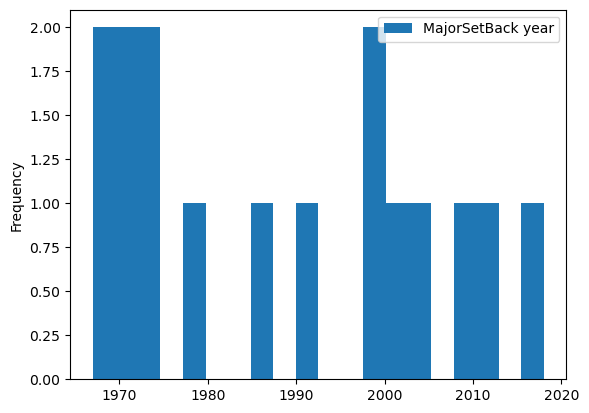

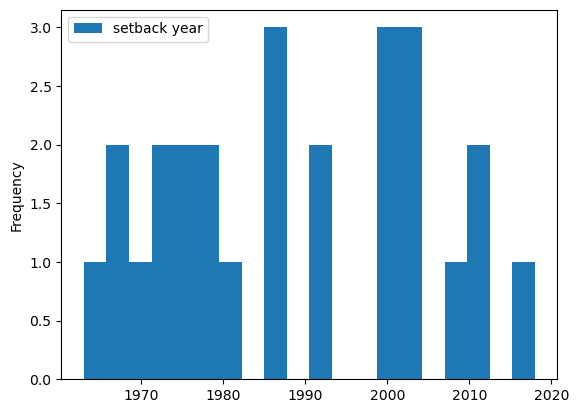

In [34]:
print("US's country set back years")
setbackCheck(df_US, 5)
# seems nice, 26 set back years and 16 Major country setback years in US history

RU's country set back years
there's  32 set back years, and 17 Major set back years


1

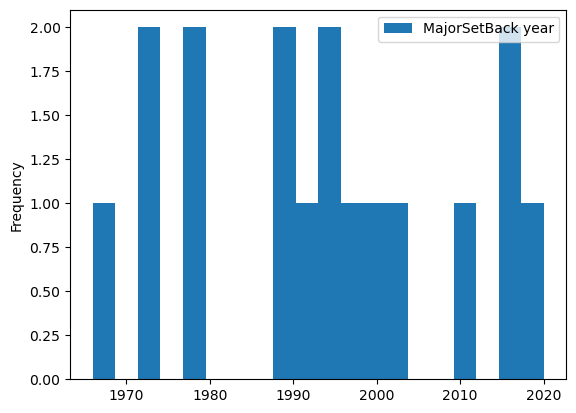

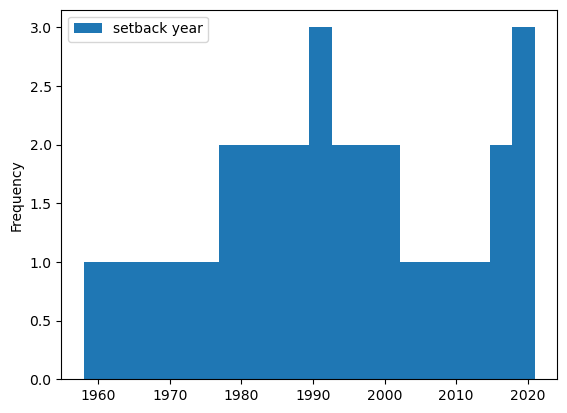

In [35]:
# let's see Russia! I'd expect there's a lot more set back years and major set back years from it's line graph in Section 3
print("RU's country set back years")
setbackCheck(df_RU, 5)
# 32 set back years, and 17 major country setback years
# oops, seems right overall, but less major set back years as I expected


<h1>Section 5: Overall Summary</h1> 


From the yearly number of objects launched into outer-space(LOS objects) dataset, we could tell a lot. The space technology is always a decent representation of human's great progress.

We are currently in a burst space period with advanced technology. The world-wide count LOS objects greatly increased from around 250 to 2478 pieces per year from 2015 to 2022, compared to human only got 2 objects launched into outer space in 1957. United States, Russia, China, United Kingdom, and Japan are top 5 contributors to the 14599 accumulative LOS objects. Special credit for United States and Russia, which each sent 7466 and 3661 objects since 1957.

With in Top 5, Russia had a different path way: great rise trend from 1960 to 1980, but following a big down hill trend till the late 1990s.

Let's see some data: we got 14 world-wide major set back years which the amount of LOS objects decreased more than 10 pieces from past year. The US gets 16 Major country set back years which the amount of LOS objects decreased more than 5 pieces from past year. The Russia gets 17 Major country set back years. Noticeable, the US, Russia, and the world's set back years clustered around the 1990s, which is 10 years within the end of coldwar.

But things changed, we improved a lot. With the linear model's prediction, human will launch 2976 objects into outer space just within 2025.